In [9]:
import requests
import pandas as pd

base_url = "https://api.telemetry.smswithoutborders.com/v1/signup?start_date=2021-01-10&end_date=2025-01-10&granularity=day&group_by=date&page=1&page_size=10"

# Initialize variables
all_data = []  # To store all records
current_page = 1  # Start with the first page
page_size = 50  # Adjust as per your API

while True:
    # Fetch data for the current page
    response = requests.get(base_url, params={"page": current_page, "page_size": page_size})
    
    if response.status_code != 200:
        print(f"Failed to fetch data for page {current_page}. Status code: {response.status_code}")
        break

    # Parse the JSON response
    data = response.json()
    
    # Extract the signup data and pagination info
    signup_data = data["signup"]["data"]
    pagination = data["signup"]["pagination"]
    
    # Append the current page's data
    all_data.extend(signup_data)
    
    # Check if this is the last page
    if current_page >= pagination["total_pages"]:
        break
    
    # Move to the next page
    current_page += 1

e
df1 = pd.DataFrame(all_data)


print("All Data:")
print(df1)


All Data:
     signup_users   timeframe
0               7  2025-01-08
1               1  2025-01-07
2               3  2025-01-06
3               3  2025-01-05
4               1  2025-01-04
..            ...         ...
419             2  2022-07-23
420             2  2022-07-21
421             1  2022-07-14
422             2  2022-07-01
423             1  2022-06-26

[424 rows x 2 columns]


In [10]:
# API base URL
base_url = "https://api.telemetry.smswithoutborders.com/v1/signup?start_date=2021-01-10&end_date=2025-01-10&granularity=day&group_by=country&page=1&page_size=10"

# Initialize variables
all_data = []  # To store all records
current_page = 1  # Start with the first page
page_size = 50  # Adjust as per your API

while True:
    # Fetch data for the current page
    response = requests.get(base_url, params={"page": current_page, "page_size": page_size})
    
    if response.status_code != 200:
        print(f"Failed to fetch data for page {current_page}. Status code: {response.status_code}")
        break

    # Parse the JSON response
    data = response.json()
    
    # Extract the signup data and pagination info
    signup_data = data["signup"]["data"]
    pagination = data["signup"]["pagination"]
    
    # Append the current page's data
    all_data.extend(signup_data)
    
    # Check if this is the last page
    if current_page >= pagination["total_pages"]:
        break
    
    # Move to the next page
    current_page += 1

# Convert the collected data to a Pandas DataFrame
df2 = pd.DataFrame(all_data)

# Display the resulting DataFrame
print("All Data:")
print(df2)


All Data:
    country_code  signup_users
0             IN           349
1             US           288
2             BD           139
3             CM           125
4             PH            64
..           ...           ...
119           XK             1
120           FJ             1
121           AO             1
122           MG             1
123           SI             1

[124 rows x 2 columns]


In [11]:
# API base URL
base_url = "https://api.telemetry.smswithoutborders.com/v1/retained?start_date=2021-01-10&end_date=2025-01-10&granularity=day&group_by=date&page=1&page_size=10"

# Initialize variables
all_data = []  # To store all records
current_page = 1  # Start with the first page
page_size = 50  # Adjust as per your API

while True:
    # Fetch data for the current page
    response = requests.get(base_url, params={"page": current_page, "page_size": page_size})
    
    if response.status_code != 200:
        print(f"Failed to fetch data for page {current_page}. Status code: {response.status_code}")
        break

    # Parse the JSON response
    data = response.json()
    
    # Extract the signup data and pagination info
    retained_data = data["retained"]["data"]
    pagination = data["retained"]["pagination"]
    
    # Append the current page's data
    all_data.extend(retained_data)
    
    # Check if this is the last page
    if current_page >= pagination["total_pages"]:
        break
    
    # Move to the next page
    current_page += 1

# Convert the collected data to a Pandas DataFrame
df3 = pd.DataFrame(all_data)

# Display the resulting DataFrame
print("All Data:")
print(df3)


All Data:
     retained_users   timeframe
0                 5  2025-01-08
1                 1  2025-01-07
2                 2  2025-01-06
3                 2  2025-01-05
4                 1  2025-01-04
..              ...         ...
419               2  2022-07-23
420               2  2022-07-21
421               1  2022-07-14
422               2  2022-07-01
423               1  2022-06-26

[424 rows x 2 columns]


In [12]:
df_sr = pd.merge(df1, df3, on="timeframe")
df_sr

,signup_users,timeframe,retained_users
0,7,2025-01-08,5
1,1,2025-01-07,1
2,3,2025-01-06,2
3,3,2025-01-05,2
4,1,2025-01-04,1
...,...,...,...
419,2,2022-07-23,2
420,2,2022-07-21,2
421,1,2022-07-14,1
422,2,2022-07-01,2


In [13]:
new_dfsr = df_sr.set_index("timeframe")
new_dfsr

,signup_users,retained_users
timeframe,,
2025-01-08,7,5
2025-01-07,1,1
2025-01-06,3,2
2025-01-05,3,2
2025-01-04,1,1
...,...,...
2022-07-23,2,2
2022-07-21,2,2
2022-07-14,1,1


In [14]:
df_sr["timeframe"] = pd.to_datetime(df_sr["timeframe"])
df_sr["year"] =df_sr["timeframe"].dt.year
df_sr

,signup_users,timeframe,retained_users,year
0,7,2025-01-08,5,2025
1,1,2025-01-07,1,2025
2,3,2025-01-06,2,2025
3,3,2025-01-05,2,2025
4,1,2025-01-04,1,2025
...,...,...,...,...
419,2,2022-07-23,2,2022
420,2,2022-07-21,2,2022
421,1,2022-07-14,1,2022
422,2,2022-07-01,2,2022


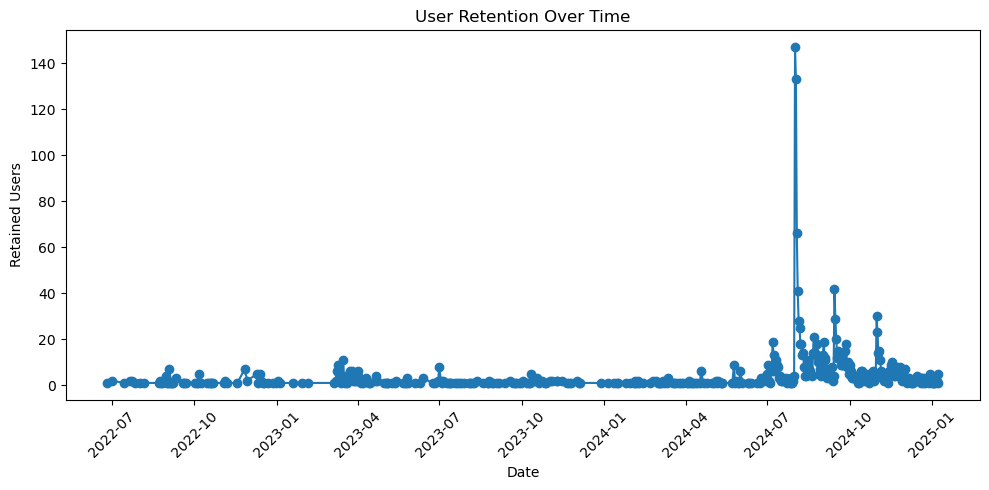

{'Total Signups': 2040, 'Total Retained Users': 2014, 'Overall Retention Rate': '98.73%', 'Days Tracked': 424, 'Max Daily Retention': 147, 'Min Daily Retention': 1}


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_retention(df_sr):
    # Retention Rate Calculation
    total_users = df_sr['signup_users'].sum()
    retained_users = df_sr['retained_users'].sum()
    retention_rate = (retained_users / total_users) * 100
    
    # Trend Analysis
    plt.figure(figsize=(10,5))
    plt.plot(df_sr['timeframe'], df_sr['retained_users'], marker='o')
    plt.title('User Retention Over Time')
    plt.xlabel('Date')
    plt.ylabel('Retained Users')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return {
        'Total Signups': total_users,
        'Total Retained Users': retained_users,
        'Overall Retention Rate': f"{retention_rate:.2f}%",
        'Days Tracked': len(df_sr),
        'Max Daily Retention': df_sr['retained_users'].max(),
        'Min Daily Retention': df_sr['retained_users'].min()
    }

results = analyze_retention(df_sr)
print(results)

In [22]:
def comprehensive_analysis(df_sr):
    # Signup Analysis
    total_signups = df_sr['signup_users'].sum()
    total_retained = df_sr['retained_users'].sum()
    
    # Signup Growth Rate
    df_sr['signup_growth_rate'] = (df_sr['signup_users'] - df_sr['signup_users'].shift(1)) / df_sr['signup_users'].shift(1) * 100
    
    # Retention Rate
    retention_rate = (total_retained / total_signups) * 100
    
    return {
        'Total Signups': total_signups,
        'Total Retained Users': total_retained,
        'Retention Rate': f"{retention_rate:.2f}%",
        'Average Daily Signups': df_sr['signup_users'].mean(),
        'Average Daily Retained Users': df_sr['retained_users'].mean(),
        'Signup Growth Rates': df_sr['signup_growth_rate'].tolist(),
        'Average Signup Growth Rate': df_sr['signup_growth_rate'].mean()
    }

# Run analysis
analysis_results = comprehensive_analysis(df_sr)
print(analysis_results)

{'Total Signups': 2040, 'Total Retained Users': 2014, 'Retention Rate': '98.73%', 'Average Daily Signups': 4.811320754716981, 'Average Daily Retained Users': 4.75, 'Signup Growth Rates': [nan, -85.71428571428571, 200.0, 0.0, -66.66666666666666, 0.0, 0.0, 100.0, 50.0, 66.66666666666666, -60.0, 0.0, 0.0, 0.0, -50.0, 400.0, -20.0, 0.0, 0.0, -25.0, 66.66666666666666, -60.0, 50.0, 33.33333333333333, -25.0, 66.66666666666666, -60.0, 0.0, -50.0, 200.0, -66.66666666666666, 100.0, 50.0, 0.0, -66.66666666666666, 100.0, 250.0, -42.857142857142854, 0.0, 0.0, -50.0, 50.0, 166.66666666666669, -37.5, 0.0, 60.0, -25.0, -33.33333333333333, 25.0, -20.0, 100.0, 25.0, -10.0, -33.33333333333333, -83.33333333333334, 400.0, -20.0, 0.0, 0.0, -50.0, 50.0, 33.33333333333333, 50.0, 83.33333333333334, 36.36363636363637, -6.666666666666667, 64.28571428571429, 30.434782608695656, -90.0, 33.33333333333333, -50.0, 200.0, -66.66666666666666, 100.0, -25.0, 33.33333333333333, -75.0, 400.0, -40.0, 33.33333333333333, 0.0,

In [27]:
def comprehensive_analysis(df_sr):
    # Signup Analysis
    total_signups = df_sr['signup_users'].sum()
    total_retained = df_sr['retained_users'].sum()
    
    # Overall Growth Rate Calculation
    initial_signups = df_sr['signup_users'].iloc[-1]  # First day's signups
    final_signups = df_sr['signup_users'].iloc[0]    # Last day's signups
    overall_signup_growth_rate = ((final_signups - initial_signups) / initial_signups) * 100
    
    # Retention Rate
    retention_rate = (total_retained / total_signups) * 100
    
    return {
        'Total Signups': total_signups,
        'Total Retained Users': total_retained,
        'Retention Rate': f"{retention_rate:.2f}%",
        'Overall Signup Growth Rate': f"{overall_signup_growth_rate:.2f}%",
        'Average Daily Signups': df_sr['signup_users'].mean(),
        'Average Daily Retained Users': df_sr['retained_users'].mean()
    }

# Run analysis
analysis_results = comprehensive_analysis(df_sr)
print(analysis_results)

{'Total Signups': 2040, 'Total Retained Users': 2014, 'Retention Rate': '98.73%', 'Overall Signup Growth Rate': '600.00%', 'Average Daily Signups': 4.811320754716981, 'Average Daily Retained Users': 4.75}


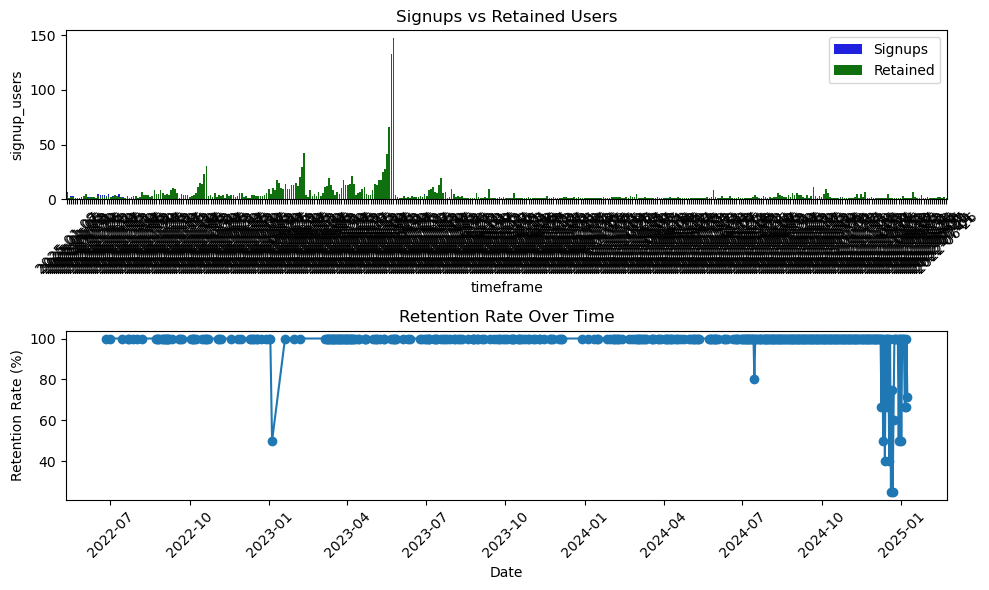

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_retention(df_sr):
    plt.figure(figsize=(10, 6))
    
    # Bar plot of signups vs retained users
    plt.subplot(2, 1, 1)
    sns.barplot(x='timeframe', y='signup_users', data=df_sr, color='blue', label='Signups')
    sns.barplot(x='timeframe', y='retained_users', data=df_sr, color='green', label='Retained')
    plt.title('Signups vs Retained Users')
    plt.xticks(rotation=45)
    plt.legend()
    
    # Line plot of retention rate
    plt.subplot(2, 1, 2)
    retention_rate = df_sr['retained_users'] / df_sr['signup_users'] * 100
    plt.plot(df_sr['timeframe'], retention_rate, marker='o')
    plt.title('Retention Rate Over Time')
    plt.xlabel('Date')
    plt.ylabel('Retention Rate (%)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Visualize retention
plot_retention(df_sr)

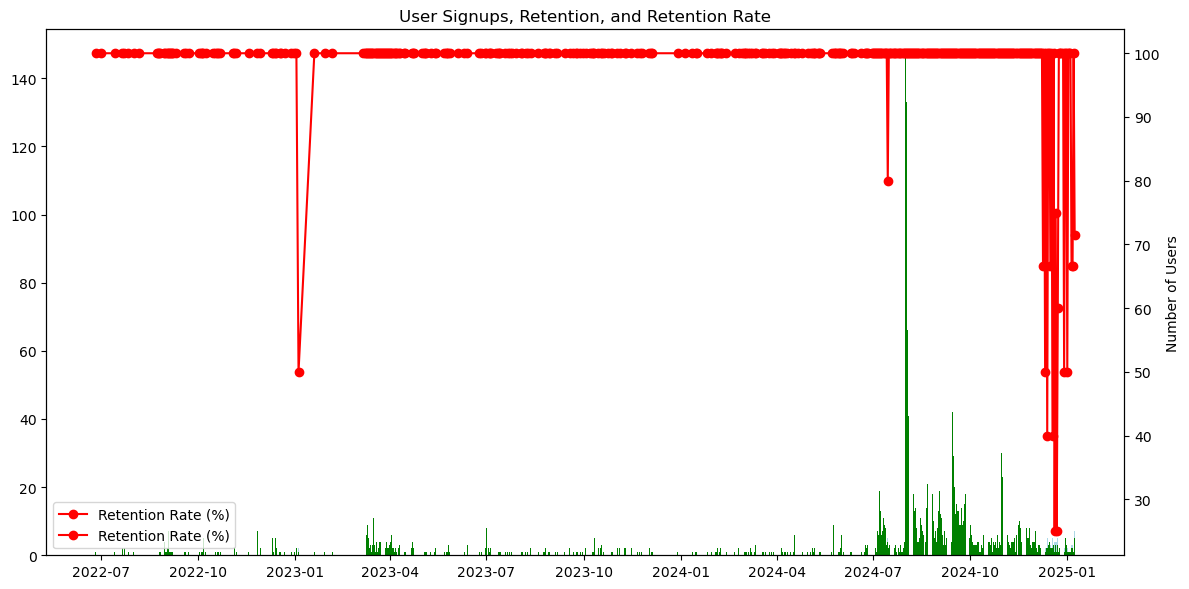

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_retention(df_sr):
    plt.figure(figsize=(12, 6))
    
    # Retention Rate Calculation
    df_sr['retention_rate'] = df_sr['retained_users'] / df_sr['signup_users'] * 100
    
    # Stacked Bar Plot
    plt.subplot(1, 1, 1)
    plt.bar(df_sr['timeframe'], df_sr['signup_users'], label='Total Signups', color='lightblue')
    plt.bar(df_sr['timeframe'], df_sr['retained_users'], label='Retained Users', color='green')
    
    # Overlay retention rate line
    ax2 = plt.twinx()
    ax2.plot(df_sr['timeframe'], df_sr['retention_rate'], color='red', marker='o', label='Retention Rate (%)')
    ax2.set_ylabel('Retention Rate (%)')
    
    plt.title('User Signups, Retention, and Retention Rate')
    plt.xlabel('Date')
    plt.ylabel('Number of Users')
    plt.xticks(rotation=45)
    
    # Combine legends
    lines, labels = plt.gca().get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')
    
    plt.tight_layout()
    plt.show()

# Visualize retention
plot_retention(df_sr)

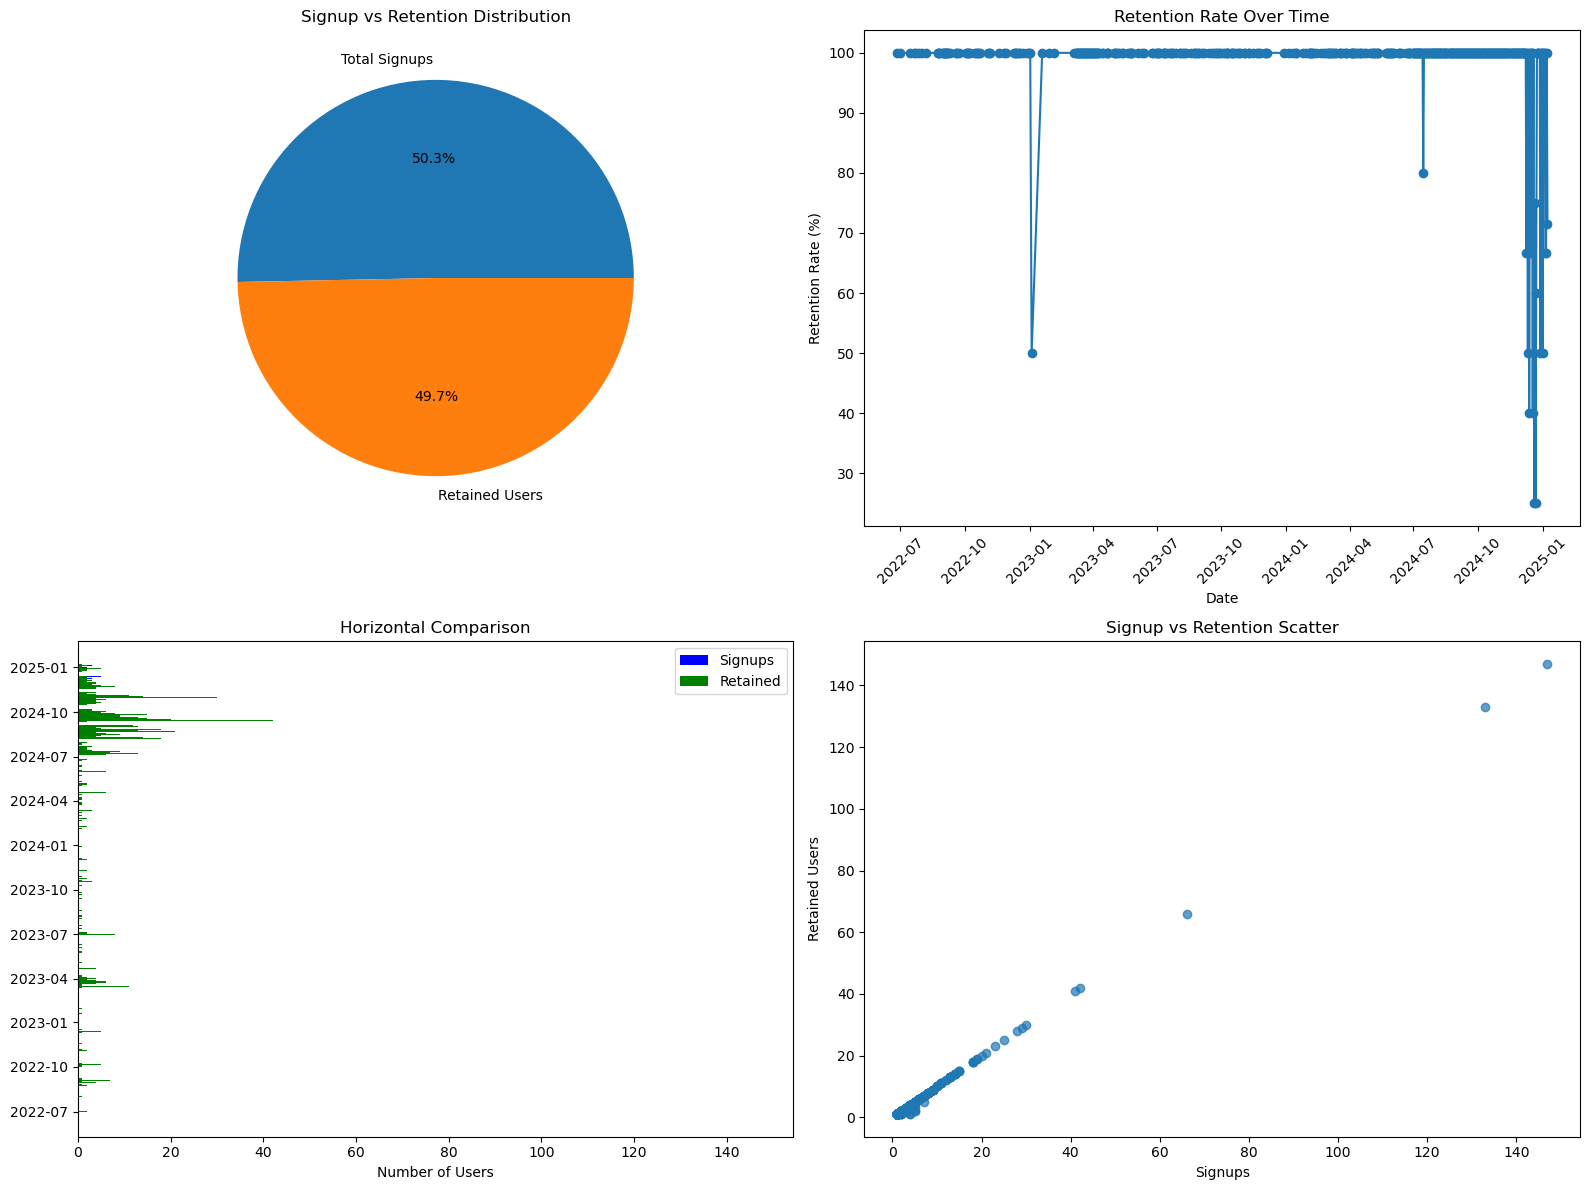

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_retention_multiple_views(df_sr):
    # Calculate retention rate
    df_sr['retention_rate'] = df_sr['retained_users'] / df_sr['signup_users'] * 100
    
    plt.figure(figsize=(16, 12))
    
    # 1. Pie Chart: Signup vs Retention
    plt.subplot(2, 2, 1)
    plt.pie(
        [df_sr['signup_users'].sum(), df_sr['retained_users'].sum()], 
        labels=['Total Signups', 'Retained Users'],
        autopct='%1.1f%%'
    )
    plt.title('Signup vs Retention Distribution')
    
    # 2. Line Chart: Retention Rate Over Time
    plt.subplot(2, 2, 2)
    plt.plot(df_sr['timeframe'], df_sr['retention_rate'], marker='o')
    plt.title('Retention Rate Over Time')
    plt.xlabel('Date')
    plt.ylabel('Retention Rate (%)')
    plt.xticks(rotation=45)
    
    # 3. Horizontal Bar Chart: Signups vs Retained
    plt.subplot(2, 2, 3)
    plt.barh(df_sr['timeframe'], df_sr['signup_users'], label='Signups', color='blue')
    plt.barh(df_sr['timeframe'], df_sr['retained_users'], label='Retained', color='green')
    plt.title('Horizontal Comparison')
    plt.xlabel('Number of Users')
    plt.legend()
    
    # 4. Scatter Plot: Signups vs Retention
    plt.subplot(2, 2, 4)
    plt.scatter(df_sr['signup_users'], df_sr['retained_users'], alpha=0.7)
    plt.title('Signup vs Retention Scatter')
    plt.xlabel('Signups')
    plt.ylabel('Retained Users')
    
    plt.tight_layout()
    plt.show()

# Visualize retention
plot_retention_multiple_views(df_sr)


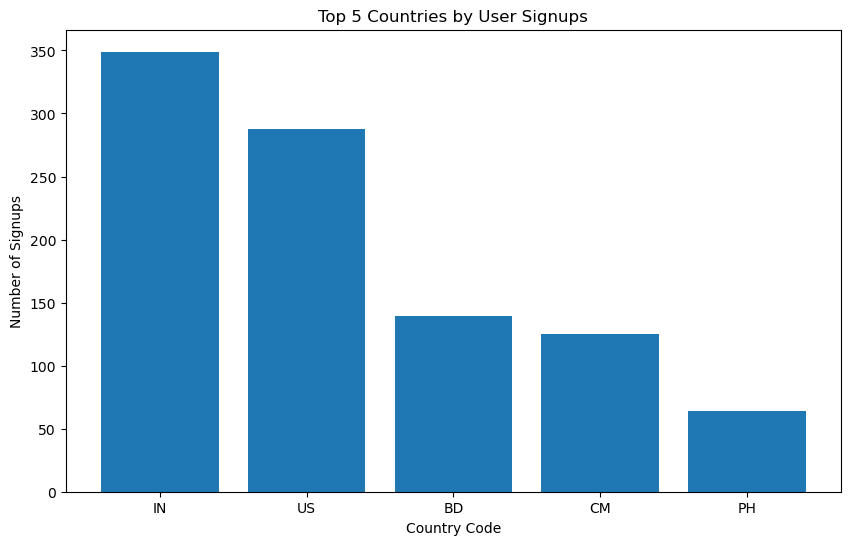

{'Total Countries': 124, 'Total Signups': 2040, 'Average Signups per Country': 16.451612903225808, 'Top 5 Countries': {'IN': 349, 'US': 288, 'BD': 139, 'CM': 125, 'PH': 64}}


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_signups_by_country(df2):
    # Top 5 countries by signups
    top_countries = df2.nlargest(5, 'signup_users')
    
    plt.figure(figsize=(10,6))
    plt.bar(top_countries['country_code'], top_countries['signup_users'])
    plt.title('Top 5 Countries by User Signups')
    plt.xlabel('Country Code')
    plt.ylabel('Number of Signups')
    plt.show()
    
    return {
        'Total Countries': len(df2),
        'Total Signups': df2['signup_users'].sum(),
        'Average Signups per Country': df2['signup_users'].mean(),
        'Top 5 Countries': dict(zip(top_countries['country_code'], top_countries['signup_users']))
    }

# Analyze and print results
results = analyze_signups_by_country(df2)
print(results)

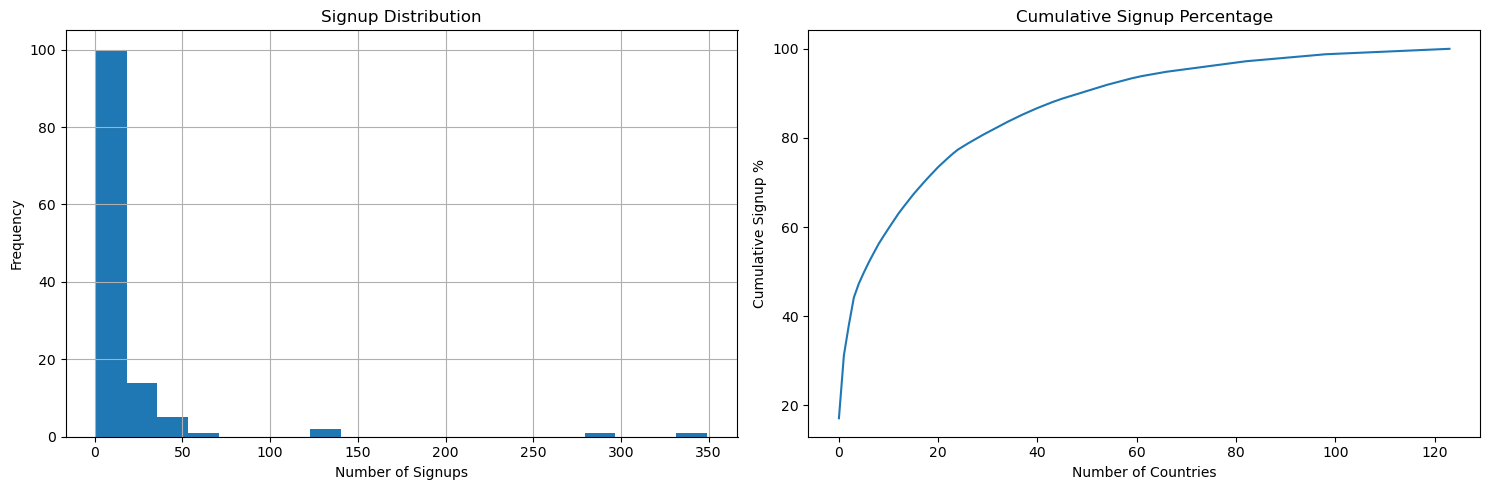

{'Signup Distribution': {'Total Countries': 124, 'Total Signups': 2040, 'Mean Signups per Country': 16.451612903225808, 'Median Signups': 4.5, 'Countries Above Mean': 25}, 'Performance Metrics': {'Top 3 Countries': [{'country_code': 'IN', 'signup_users': 349}, {'country_code': 'US', 'signup_users': 288}, {'country_code': 'BD', 'signup_users': 139}], 'Bottom 3 Countries': [{'country_code': 'XK', 'signup_users': 1}, {'country_code': 'SY', 'signup_users': 1}, {'country_code': 'LU', 'signup_users': 1}], 'Signup Concentration': 16.451612903225808}, 'Statistical Insights': {'Standard Deviation': 43.64814132674873, 'Signup Variance': 1905.1602412798304, 'Skewness': 5.957584967838368}}


In [29]:
def comprehensive_country_analysis(df2):
    # Detailed signup analysis
    insights = {
        'Signup Distribution': {
            'Total Countries': len(df2),
            'Total Signups': df2['signup_users'].sum(),
            'Mean Signups per Country': df2['signup_users'].mean(),
            'Median Signups': df2['signup_users'].median(),
            'Countries Above Mean': len(df2[df2['signup_users'] > df2['signup_users'].mean()])
        },
        'Performance Metrics': {
            'Top 3 Countries': df2.nlargest(3, 'signup_users')[['country_code', 'signup_users']].to_dict('records'),
            'Bottom 3 Countries': df2.nsmallest(3, 'signup_users')[['country_code', 'signup_users']].to_dict('records'),
            'Signup Concentration': df2['signup_users'].sum() / len(df2)
        },
        'Statistical Insights': {
            'Standard Deviation': df2['signup_users'].std(),
            'Signup Variance': df2['signup_users'].var(),
            'Skewness': df2['signup_users'].skew()
        }
    }
    
    # Visualization
    plt.figure(figsize=(15,5))
    
    # Signup Distribution Histogram
    plt.subplot(1,2,1)
    df2['signup_users'].hist(bins=20)
    plt.title('Signup Distribution')
    plt.xlabel('Number of Signups')
    plt.ylabel('Frequency')
    
    # Cumulative Signup Percentage
    plt.subplot(1,2,2)
    cumulative_signups = df2['signup_users'].sort_values(ascending=False).cumsum() / df2['signup_users'].sum() * 100
    plt.plot(range(len(cumulative_signups)), cumulative_signups)
    plt.title('Cumulative Signup Percentage')
    plt.xlabel('Number of Countries')
    plt.ylabel('Cumulative Signup %')
    
    plt.tight_layout()
    plt.show()
    
    return insights


advanced_insights = comprehensive_country_analysis(df2)
print(advanced_insights)